<a href="https://colab.research.google.com/github/JhonaGo/BI-Tools/blob/main/Price_Elasticity_Demand_(PED).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Paqueterias***

In [ ]:
#libreria

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#omitir notacion cientifica
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#dimensionalidad del data frame

df = pd.read_excel("mercado_iscam.xlsx")
df.shape

(37381, 21)

# Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37381 entries, 0 to 37380
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DIM Area[NomArea]                37381 non-null  object 
 1   DIM Producto[NomFabricante]      37381 non-null  object 
 2   DIM Producto[NomMarca]           37381 non-null  object 
 3   DIM Producto[DescProducto]       37381 non-null  object 
 4   DIM Producto[IdUPC]              26864 non-null  float64
 5   DIM Producto[NomMarcaUnificada]  37381 non-null  object 
 6   DIM Producto[NomSubmarca]        37381 non-null  object 
 7   Calendario[MES NIELSEN]          37381 non-null  int64  
 8   Calendario[AÑO NIELSEN]          37381 non-null  int64  
 9   DIM Producto[NomSegmento]        37381 non-null  object 
 10  DIM Mercado[NomMercado]          37381 non-null  object 
 11  DIM Origen[NomFuenteOrigen]      37381 non-null  object 
 12  DIM Producto[ValCo

In [ ]:
#creacion de columna fecha

df["fecha"] = "01"+"/"+df["Calendario[MES NIELSEN]"].astype(str)+"/"+ df["Calendario[AÑO NIELSEN]"].astype(str)

In [ ]:
df['fecha'].unique()

array(['01/1/2024', '01/1/2025', '01/2/2024', '01/2/2025', '01/3/2024',
       '01/4/2024', '01/5/2024', '01/6/2024', '01/7/2024', '01/8/2024',
       '01/9/2024', '01/10/2024', '01/11/2024', '01/12/2024'],
      dtype=object)

##Segementacion del dataset

Valores unico del dataset

In [ ]:
for x in df.columns:
    print(f'{x} : {list(df[x].drop_duplicates())}')

DIM Area[NomArea] : ['AREA 3', 'AREA 5', 'AREA 1', 'AREA 2', 'AREA 4', 'AREA 6']
DIM Producto[NomFabricante] : ['KIMBERLY-CLARK', 'SAN FRANCISCO', 'DEMAS FABRICANTES', 'SOFTYS', 'ESSITY']
DIM Producto[NomMarca] : ['VOGUE', 'KLEENEX', 'ADORABLE', 'BIG FACIAL QUALITY', 'SUAVEL', 'MAXIMA PREMIUM', 'PREMIER', 'COTTONELLE', 'PETALO', 'DEMAS MARCAS', 'REGIO', 'TENDER', 'KLEENEX COTTONELLE', 'ELITE', "MEMBER'S CHOICE", 'DELICATTO', 'LEVEL', 'FACIAL QUALITY', 'DESCONOCIDO', 'DE MI HOGAR', 'HOGAR', 'HORTENSIA', 'MONARCA', 'KLEENEX 500', 'BIG ROLL', 'FAMILIAR', 'SOFT & WINNER', 'DELICATTO PLUS', 'KING BLUE', 'BOSQUE VERDE', 'COMPETENCIA', 'CHARMIN', 'LOVLY', 'DELSEY', 'LYS', 'IRIS', 'TEN STARS', 'FLAMINGO', 'FLORAL', 'SNOW SOFT', 'BELA', 'BUEN DAR', 'DAISY', 'EXTRA CHOBY', 'SUAVECIN']
DIM Producto[DescProducto] : ['PH VOGUE 96R 400HD', 'PH KLEENEX BRAND 80R 400HD', 'PH ADORABLE 80R 400HD', 'PH VOGUE 80R 400HD', 'PH BIG FACIAL QUALITY 60R 340HD', 'PH BIG FACIAL QUALITY 48R 400HD', 'PH SUAVEL 48R 

Atributos para trabajar en el modelo

In [ ]:
area=df["DIM Area[NomArea]"]=="AREA 3"
#segmento=df["DIM Producto[NomSegmento]"]=="ECONOMICO"
mercado=df["DIM Mercado[NomMercado]"]=="Autoservicios Propios del Mayoreo"
#paquete=df["[AverageValConteo]"]==4
#hojas=df["[AverageValNumeroHoja]"]==600

region=df[area]

In [ ]:
region.shape

(7045, 22)

1) Tabla de contigencia: con el objetivo de resumir los valores y las observaciones

In [ ]:
region = region.groupby(['fecha','DIM Producto[DescProducto]']).agg({'[SumValVentaPesos]':'mean','[SumValVentaPaquetes]': 'mean' }).reset_index()
region

,fecha,DIM Producto[DescProducto],[SumValVentaPesos],[SumValVentaPaquetes]
0,01/1/2024,PH MAXIMA PREMIUM 4R 375HD,59488.10,3544.32
1,01/1/2024,PH ADORABLE 12R 270HD,22926.32,406.22
2,01/1/2024,PH ADORABLE 1R 400HD,11361.49,1524.91
3,01/1/2024,PH ADORABLE 4R 270HD,74422.98,4082.93
4,01/1/2024,PH ADORABLE 4R 360HD,374604.37,15275.54
...,...,...,...,...
2867,01/9/2024,PH VOGUE 1R 600HD,86596.74,11326.18
2868,01/9/2024,PH VOGUE 4R 400HD,4408393.30,190454.15
2869,01/9/2024,PH VOGUE 4R 600HD,16748869.15,570429.05
2870,01/9/2024,PH VOGUE 4R 800HD,1634805.53,36076.50


## Eficiencia de Pareto

Con el objetivo de eficientizar el modelo de regresión, utilizaremos la regla de 80/20, donde solo se contará con el 80% de los datos que aportan información suficiente y relevante

[Pareto](https://towardsdatascience.com/reduce-warehouse-space-with-the-pareto-principle-using-python-e722a6babe0e/)

In [ ]:
# Sku/venta en pesos
df_par = pd.DataFrame(region.groupby(["DIM Producto[DescProducto]"])['[SumValVentaPesos]'].sum())
df_par.columns = ['[SumValVentaPesos]']

# Ordenacion de valores
df_par.sort_values(['[SumValVentaPesos]'], ascending = False, inplace = True)
df_par.reset_index(inplace = True)

# Suma cumulativa
df_par['CumSum'] = df_par['[SumValVentaPesos]'].cumsum()

# % CumSum
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par["[SumValVentaPesos]"].sum())

# % SKU
df_par['%SKU'] = (100 * (df_par.index + 1).astype(float)/(df_par.index.max() + 1))

# imprimir tabla
print("Pareto Analysis for {:,} unique SKU".format(len(df_par)))
df_par.set_index(["DIM Producto[DescProducto]"]).tail()

Pareto Analysis for 279 unique SKU


,[SumValVentaPesos],CumSum,%CumSum,%SKU
DIM Producto[DescProducto],,,,
PH REGIO AIRES DE FRESCURA 4R 250HD,44.74,1446106520.84,100.00,98.57
PH DELSEY 4R 234HD,31.00,1446106551.84,100.00,98.92
PH REGIO RINDE MAS 4R 390HD,25.79,1446106577.63,100.00,99.28
PH SUAVEL SUPREMO 4R 351HD,24.09,1446106601.72,100.00,99.64
PH SUAVEL 6R 234HD,22.87,1446106624.59,100.00,100.00


In [ ]:
# descargar los reultados calculados de Pareto
df_par.to_excel("pareto.xlsx")

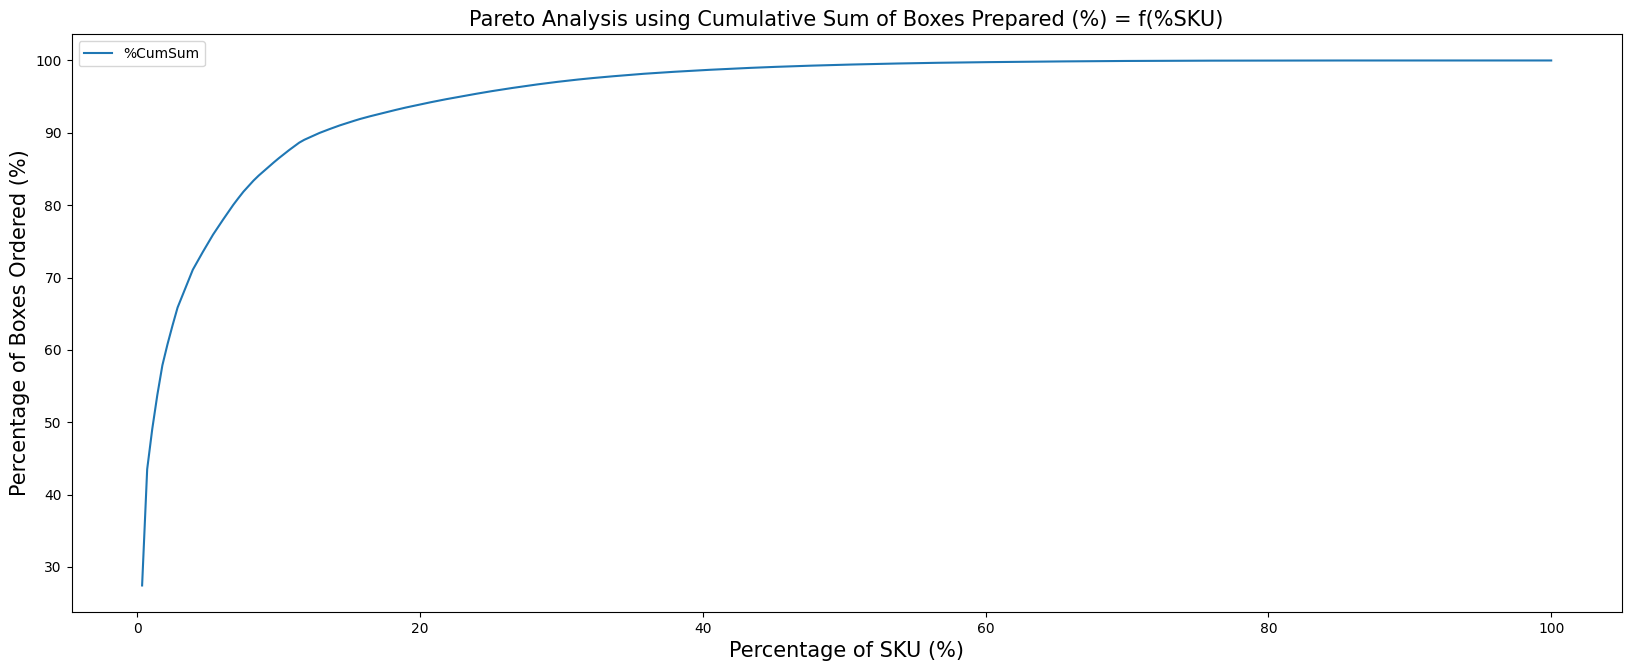

In [ ]:
ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Boxes Ordered (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Boxes Prepared (%) = f(%SKU)', fontsize = 15)
plt.show()

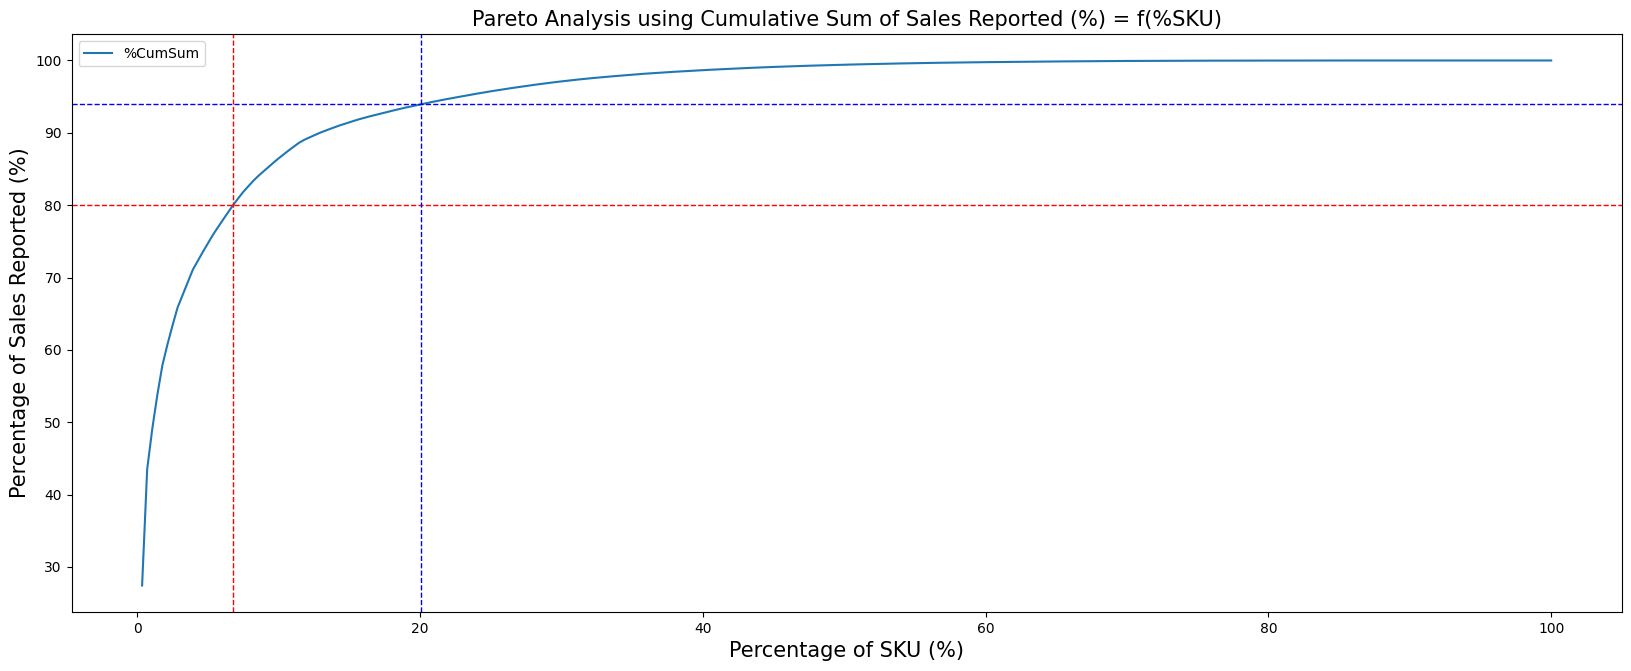

In [ ]:
# > 80% Volume
df_par80 = df_par[df_par['%CumSum'] >= 80].copy()
perc_sku80 = df_par80['%SKU'].min()
perc_sum80 = df_par80['%CumSum'].min()

# 20% SKU
df_sku20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_sku20['%SKU'].min()
perc_sum20 = df_sku20['%CumSum'].min()

ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (20,7.5))
plt.xlabel('Percentage of SKU (%)',fontsize=15)
plt.ylabel('Percentage of Sales Reported (%)',fontsize=15)
plt.title('Pareto Analysis using Cumulative Sum of Sales Reported (%) = f(%SKU)', fontsize = 15)

# 80% Volume
ax.axhline(perc_sum80 , color="red", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku80, color="red", linestyle="--", linewidth = 1.0)

# 20% SKU
ax.axhline(perc_sum20 , color="blue", linestyle="--", linewidth = 1.0)
ax.axvline(perc_sku20, color="blue", linestyle="--", linewidth = 1.0)
plt.show()

Extraer el 80% de los datos que aportan información en el dataset construido originalmente

In [ ]:
df_par80 = df_par[df_par['%CumSum'] <=80].copy()

# Añadir etiqueta sobre el criterio de eficiencia
df_par80["eficiencia"] = "eficiente" if df_par80["%CumSum"].any() <= 80 else "ineficiente"

df_par80.tail()

,DIM Producto[DescProducto],[SumValVentaPesos],CumSum,%CumSum,%SKU,eficiencia
13,PH REGIO RINDE MAS 6R 540HD,17332709.82,1081038467.26,74.76,5.02,eficiente
14,PH PREMIER 4R 400HD,16999903.51,1098038370.76,75.93,5.38,eficiente
15,PH PETALO ULTRA RESISTENTE 6R 600HD,15201741.14,1113240111.90,76.98,5.73,eficiente
16,PH ADORABLE 4R 400HD,15151036.43,1128391148.34,78.03,6.09,eficiente
17,PH MR BIG 4R 600HD,14729221.81,1143120370.15,79.05,6.45,eficiente


Es necesario filtrar el dataset a trabajar a nivel region, pero incluyendo el criterio de Pareto.

In [ ]:
# merge Pareto + Dataset
region = pd.merge(region, df_par80[["DIM Producto[DescProducto]", "eficiencia"]],
                  on="DIM Producto[DescProducto]", how="left")

# filtrar solo los eficientes
region = region[region["eficiencia"] == "eficiente"]

# eliminar el atributo de eficiencia
#region.drop("eficiencia", axis=1, inplace=True)

region.tail()

,fecha,DIM Producto[DescProducto],[SumValVentaPesos],[SumValVentaPaquetes],eficiencia
2846,01/9/2024,PH REGIO RINDE MAS 6R 540HD,1253.94,30.80,eficiente
2868,01/9/2024,PH VOGUE 4R 400HD,4408393.30,190454.15,eficiente
2869,01/9/2024,PH VOGUE 4R 600HD,16748869.15,570429.05,eficiente
2870,01/9/2024,PH VOGUE 4R 800HD,1634805.53,36076.50,eficiente
2871,01/9/2024,PH VOGUE 6R 600HD,3938305.39,79424.31,eficiente


In [ ]:
region['DIM Producto[DescProducto]'].unique()

array(['PH ADORABLE 4R 400HD', 'PH ADORABLE 6R 550HD',
       'PH BIG FACIAL QUALITY 6R 550HD', 'PH BIG FACIAL QUALITY 6R 600HD',
       'PH BIG ROLL 6R 550HD', 'PH MR BIG 4R 600HD',
       'PH PETALO ULTRA RESISTENTE 6R 500HD',
       'PH PETALO ULTRA RESISTENTE 6R 600HD', 'PH PREMIER 4R 400HD',
       'PH PREMIER RENDIPLUS 6R 500HD', 'PH REGIO RINDE MAS 4R 400HD',
       'PH REGIO RINDE MAS 4R 600HD', 'PH REGIO RINDE MAS 6R 375HD',
       'PH REGIO RINDE MAS 6R 540HD', 'PH VOGUE 4R 400HD',
       'PH VOGUE 4R 600HD', 'PH VOGUE 4R 800HD', 'PH VOGUE 6R 600HD'],
      dtype=object)

## Construccion del dataset

In [ ]:
# retiramos los valores nulos de columna x fila
# region= df.dropna(how="all")

Establecemos la variable independiente **precio $** como **"x_value"**

In [ ]:
# Tabla pivote transpuesta para la variable independiente
x_pivot = region.pivot_table(index="fecha",
                             columns='DIM Producto[DescProducto]',
                             values='[SumValVentaPesos]',
                             aggfunc='sum')

# Convertir el Dataframe en un arreglo de Numpy Record
x_values = pd.DataFrame(x_pivot.to_records())

# eliminamos valores nulos a nivel columna
x_values= x_values.dropna(axis=1)

x_values.head()

,fecha,PH ADORABLE 4R 400HD,PH ADORABLE 6R 550HD,PH BIG FACIAL QUALITY 6R 550HD,PH BIG FACIAL QUALITY 6R 600HD,PH BIG ROLL 6R 550HD,PH MR BIG 4R 600HD,PH PETALO ULTRA RESISTENTE 6R 500HD,PH PETALO ULTRA RESISTENTE 6R 600HD,PH PREMIER 4R 400HD,PH PREMIER RENDIPLUS 6R 500HD,PH REGIO RINDE MAS 4R 400HD,PH REGIO RINDE MAS 4R 600HD,PH REGIO RINDE MAS 6R 375HD,PH REGIO RINDE MAS 6R 540HD,PH VOGUE 4R 400HD,PH VOGUE 4R 600HD,PH VOGUE 4R 800HD,PH VOGUE 6R 600HD
0,01/1/2024,1255734.08,2574363.69,3949093.27,30358983.07,8345178.31,1003896.37,1536365.67,2435086.16,1399055.64,1545488.92,3069345.18,1100411.49,3107855.10,4373550.06,5412577.50,15525832.63,1747117.43,4504627.69
1,01/1/2025,1085638.03,1325800.61,369516.85,31362490.31,3225924.47,1303951.90,3657823.07,351259.85,1193949.00,2284997.27,1385573.01,1524588.62,2436012.73,2481.08,4678264.37,17658840.40,2381427.83,4840541.21
2,01/10/2024,1051906.24,1521714.21,1794328.79,29622669.26,3999960.61,955844.60,3080353.24,1171925.93,1209318.18,1925332.59,2778926.81,1124042.26,1775538.38,370.18,4862833.87,15617210.71,1869483.34,4050849.09
3,01/11/2024,1015712.11,1221834.09,2762643.10,26892724.45,3783414.27,1127390.05,2398184.43,2589752.50,1158140.96,1693345.60,3531383.59,1340271.77,2206890.30,3934.34,6093971.49,19214050.23,2028373.51,3899133.07
4,01/12/2024,915360.93,1450012.60,1272211.61,25876734.45,4073980.53,1251332.53,2397237.76,986055.22,926983.94,1972606.48,3581743.45,1733952.50,2095664.57,4889.57,4695402.72,17872178.47,1717509.41,3822682.82


Establecemos la variable dependiente **paquetes vendidos** como **"y_value"**

In [ ]:
y_pivot = region.pivot_table( index = 'fecha',
                              columns='DIM Producto[DescProducto]',
                              values='[SumValVentaPaquetes]',
                              aggfunc='sum')

# Convertir el Dataframe en un arreglo de Numpy Record
y_values = pd.DataFrame(y_pivot.to_records())

# eliminamos valores nulos a nivel columna
y_values= y_values.dropna(axis=1)

y_values.head()

,fecha,PH ADORABLE 4R 400HD,PH ADORABLE 6R 550HD,PH BIG FACIAL QUALITY 6R 550HD,PH BIG FACIAL QUALITY 6R 600HD,PH BIG ROLL 6R 550HD,PH MR BIG 4R 600HD,PH PETALO ULTRA RESISTENTE 6R 500HD,PH PETALO ULTRA RESISTENTE 6R 600HD,PH PREMIER 4R 400HD,PH PREMIER RENDIPLUS 6R 500HD,PH REGIO RINDE MAS 4R 400HD,PH REGIO RINDE MAS 4R 600HD,PH REGIO RINDE MAS 6R 375HD,PH REGIO RINDE MAS 6R 540HD,PH VOGUE 4R 400HD,PH VOGUE 4R 600HD,PH VOGUE 4R 800HD,PH VOGUE 6R 600HD
0,01/1/2024,53744.85,58623.56,100131.49,648879.35,177121.93,34612.60,30706.39,46158.50,55276.21,34888.18,122192.08,31534.71,117801.06,132337.94,239100.54,530065.80,40143.99,92570.38
1,01/1/2025,47618.76,29222.25,9214.12,679874.28,66740.92,44213.12,71678.05,6228.27,47181.97,51410.19,52991.81,51862.08,100234.18,63.33,201634.89,593606.47,52446.91,95866.65
2,01/10/2024,46297.72,33859.63,44947.31,638773.82,80511.79,30399.30,62344.29,23834.80,48450.35,43011.33,110446.52,36760.20,73921.91,10.99,211347.19,534297.21,41272.06,82503.98
3,01/11/2024,44381.75,26897.98,69383.29,581319.56,76294.84,35780.80,48033.84,51927.76,46711.23,39105.21,138818.33,45523.42,89367.41,111.11,267664.12,671475.47,45386.79,78496.89
4,01/12/2024,40180.33,32062.24,32251.41,559007.11,82420.34,39296.64,47784.75,18752.07,37418.53,44661.45,136102.09,55622.97,85547.33,138.00,206210.03,624204.23,37784.52,76612.24


# Elasticidad Precio de la Demanda (unitaria)

## Modelo de Regresion General

Elasticidad Precio de la Demanda por Regresion Lineal:


*   Coefficient (Slope) * Price mean / Quantity mean



In [ ]:
# metricas
points = []
results_values = {
    "DIM Producto[DescProducto]": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
    "r2": [],
}

# Append x_values with y_values per same product name
for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    mercado = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])

# Linear Regression Model
    import statsmodels.api as sm
    x_value = mercado['x_value']
    y_value = mercado['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()


# (Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:

        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        tintercept, t_score = result.tvalues

#Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)

#Append results into dictionary for dataframe
        results_values["DIM Producto[DescProducto]"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values['t_score'].append(t_score)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        results_values["r2"].append(rsquared)

## Resultados

Visualizaremos los resultados de la regresión lineal a nivel mercado-sku-region.

In [ ]:
# construir el dataset con el diccionario del resultado
final_df = pd.DataFrame.from_dict(results_values)

# arreglo del dataset
df_elasticity =final_df[['DIM Producto[DescProducto]','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept', "r2"]]

# impresion y exportación
df_elasticity.to_excel("elasticidad_precio_demanda.xlsx")

df_elasticity

,DIM Producto[DescProducto],price_elasticity,t_score,coefficient_pvalue,slope,price_mean,quantity_mean,intercept,r2
0,PH ADORABLE 4R 400HD,0.98,39.43,0.00,0.04,1082216.89,47257.80,753.60,0.99
1,PH ADORABLE 6R 550HD,1.05,117.69,0.00,0.02,1805644.55,40669.67,-1993.53,1.00
2,PH BIG FACIAL QUALITY 6R 550HD,1.00,394.05,0.00,0.03,1285751.37,32372.78,-59.88,1.00
3,PH BIG FACIAL QUALITY 6R 600HD,0.99,37.50,0.00,0.02,28332602.05,612477.51,3925.05,0.99
4,PH BIG ROLL 6R 550HD,1.06,73.30,0.00,0.02,5735118.40,122128.63,-7091.26,1.00
5,PH MR BIG 4R 600HD,1.02,17.89,0.00,0.03,1052087.27,34020.52,-773.93,0.96
6,PH PETALO ULTRA RESISTENTE 6R 500HD,1.00,39.06,0.00,0.02,2710337.36,53949.57,61.56,0.99
7,PH PETALO ULTRA RESISTENTE 6R 600HD,1.02,69.17,0.00,0.02,1085838.65,20905.72,-367.85,1.00
8,PH PREMIER 4R 400HD,0.99,25.11,0.00,0.04,1214278.82,48714.14,535.96,0.98
9,PH PREMIER RENDIPLUS 6R 500HD,0.95,36.91,0.00,0.02,1799338.56,40873.63,1864.35,0.99


# Elasticidad Precio Cruzado de la Demanda

https://medium.com/data-science/identifying-your-price-competitors-with-cross-price-elasticities-a-practical-approach-26c19f12b1ee

Criterio de variables para el OLM

1.   Independiente x-value: precio de otros higienicos competencia de Softys
2.   Dependiente y-value: cantidad producto de la marca Softys



Inicialmente, tenemos que considerar el producto del fabricante a fin de considerarlo en la elasticidad precio curzado de la demanda. Y asi, por cada uno de los productos de la marca

In [ ]:
#marcas = region.loc[df['DIM Producto[NomFabricante]'] == "SOFTYS", 'DIM Producto[DescProducto]'].unique()

region['DIM Producto[DescProducto]'].unique()

array(['PH ADORABLE 4R 400HD', 'PH ADORABLE 6R 550HD',
       'PH BIG FACIAL QUALITY 6R 550HD', 'PH BIG FACIAL QUALITY 6R 600HD',
       'PH BIG ROLL 6R 550HD', 'PH MR BIG 4R 600HD',
       'PH PETALO ULTRA RESISTENTE 6R 500HD',
       'PH PETALO ULTRA RESISTENTE 6R 600HD', 'PH PREMIER 4R 400HD',
       'PH PREMIER RENDIPLUS 6R 500HD', 'PH REGIO RINDE MAS 4R 400HD',
       'PH REGIO RINDE MAS 4R 600HD', 'PH REGIO RINDE MAS 6R 375HD',
       'PH REGIO RINDE MAS 6R 540HD', 'PH VOGUE 4R 400HD',
       'PH VOGUE 4R 600HD', 'PH VOGUE 4R 800HD', 'PH VOGUE 6R 600HD'],
      dtype=object)

Una vez que se conoce el producto de interes, reutilizaremos los dataframes transpuestos que se construyeron previamente. Se selecciona la marca en la matriz de Cntidades y se excluye el producto en la matriz de Precios

In [ ]:
# Filtrado desde el conjunto de datos original el producto de interes
filtered_df = region[region['DIM Producto[DescProducto]'] == 'PH BIG ROLL 6R 550HD']

#matriz transpuesta con la variable dependiente: cantidades
y_pivot = filtered_df.pivot_table(index = 'fecha',columns='DIM Producto[DescProducto]',
                         values='[SumValVentaPaquetes]',
                          aggfunc='sum' )

y_values = pd.DataFrame(y_pivot.to_records())
y_values.head()

,fecha,PH BIG ROLL 6R 550HD
0,01/1/2024,177121.93
1,01/1/2025,66740.92
2,01/10/2024,80511.79
3,01/11/2024,76294.84
4,01/12/2024,82420.34


In [ ]:
#matriz transpuesta con la variable independiente: pesos $
x_pivot = region.pivot_table(index="fecha",
                         columns='DIM Producto[DescProducto]',
                         values='[SumValVentaPesos]',
                         aggfunc='sum')

x_values = pd.DataFrame(x_pivot.to_records())

# eliminar el producto de la marca
x_values = x_values.drop('PH BIG ROLL 6R 550HD', axis=1)

# eliminamos valores nulos a nivel columna
x_values= x_values.dropna(axis=1)

x_values.head()

,fecha,PH ADORABLE 4R 400HD,PH ADORABLE 6R 550HD,PH BIG FACIAL QUALITY 6R 550HD,PH BIG FACIAL QUALITY 6R 600HD,PH MR BIG 4R 600HD,PH PETALO ULTRA RESISTENTE 6R 500HD,PH PETALO ULTRA RESISTENTE 6R 600HD,PH PREMIER 4R 400HD,PH PREMIER RENDIPLUS 6R 500HD,PH REGIO RINDE MAS 4R 400HD,PH REGIO RINDE MAS 4R 600HD,PH REGIO RINDE MAS 6R 375HD,PH REGIO RINDE MAS 6R 540HD,PH VOGUE 4R 400HD,PH VOGUE 4R 600HD,PH VOGUE 4R 800HD,PH VOGUE 6R 600HD
0,01/1/2024,1255734.08,2574363.69,3949093.27,30358983.07,1003896.37,1536365.67,2435086.16,1399055.64,1545488.92,3069345.18,1100411.49,3107855.10,4373550.06,5412577.50,15525832.63,1747117.43,4504627.69
1,01/1/2025,1085638.03,1325800.61,369516.85,31362490.31,1303951.90,3657823.07,351259.85,1193949.00,2284997.27,1385573.01,1524588.62,2436012.73,2481.08,4678264.37,17658840.40,2381427.83,4840541.21
2,01/10/2024,1051906.24,1521714.21,1794328.79,29622669.26,955844.60,3080353.24,1171925.93,1209318.18,1925332.59,2778926.81,1124042.26,1775538.38,370.18,4862833.87,15617210.71,1869483.34,4050849.09
3,01/11/2024,1015712.11,1221834.09,2762643.10,26892724.45,1127390.05,2398184.43,2589752.50,1158140.96,1693345.60,3531383.59,1340271.77,2206890.30,3934.34,6093971.49,19214050.23,2028373.51,3899133.07
4,01/12/2024,915360.93,1450012.60,1272211.61,25876734.45,1251332.53,2397237.76,986055.22,926983.94,1972606.48,3581743.45,1733952.50,2095664.57,4889.57,4695402.72,17872178.47,1717509.41,3822682.82


Comprobemos las dimensiones de largo

In [ ]:
x_values.shape #precios

(14, 18)

In [ ]:
y_values.shape #cantidades

(14, 2)

Unir lo dos data frames para relizar la regresión

In [ ]:
df= pd.merge(x_values, y_values, left_on='fecha', right_on='fecha', how='left')
df.shape

(14, 19)

Puede precisarse la elaboracion del diagrama de pareto a total producto, con el objetivo de efientizar la estimacion realizada

### Modelo de Regresión General

*** No entiendo porque solo registra paquetes 12 observaciones la regresión

In [ ]:
import statsmodels.api as sm

# valores independientes
multi_xvalues = df.loc[:, df.columns[1:11]]

# variable dependiente
yvalue = df.loc[:, df.columns[-1]]

# Se agrega una intercepción al modelo (beta 0)
X = sm.add_constant(multi_xvalues)

# sm.OLS(respuesta, entrada)
model = sm.OLS(yvalue, X).fit()

#get results
results_summary = model.summary()
results_summary

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     PH BIG ROLL 6R 550HD   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.388
Method:                   Least Squares   F-statistic:                     1.824
Date:                  Fri, 11 Apr 2025   Prob (F-statistic):              0.339
Time:                          20:08:19   Log-Likelihood:                -155.08
No. Observations:                    14   AIC:                             332.2
Df Residuals:                         3   BIC:                             339.2
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                1.489e+05    6.8e+05      0.219      0.841   -2.02e+06    2.31e+06
PH ADORABLE 4R 400HD                    0.1342      0.208      0.644      0.566      -0.529       0.798
PH ADORABLE 6R 550HD                    0.0365      0.081      0.452      0.682      -0.220       0.293
PH BIG FACIAL QUALITY 6R 550HD         -0.0167      0.028     -0.595      0.593      -0.106       0.073
PH BIG FACIAL QUALITY 6R 600HD         -0.0017      0.019     -0.089      0.935      -0.063       0.059
PH MR BIG 4R 600HD                     -0.0257      0.116     -0.221      0.839      -0.396       0.344
PH PETALO ULTRA RESISTENTE 6R 500HD    -0.0350      0.050     -0.698      0.535      -0.194       0.124
PH PETALO ULTRA RESISTENTE 6R 600HD     0.0139      0.054      0.257      0.814      -0.159       0.187
PH PREMIER 4R 400HD                    -0.0144      0.265     -0.054      0.960      -0.857       0.828
PH PREMIER RENDIPLUS 6R 500HD          -0.0009      0.230     -0.004      0.997      -0.734       0.732
PH REGIO RINDE MAS 4R 400HD            -0.0165      0.041     -0.399      0.717      -0.148       0.115
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.850
Skew:                          -0.342   Prob(JB):                        0.654
Kurtosis:                       2.005   Cond. No.                     2.17e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Resultados

Conforme al ejercicio de regresión multiple,

In [ ]:
#get price mean values per product
mean_xvalues = np.mean(multi_xvalues)
#get mean quantity for y value
mean_yvalue = np.mean(yvalue)

#get pvalues of each coefficient
pvalue = model.pvalues # Changed from result.pvalues to model.pvalues

#transform summary result to a table
results_as_html = results_summary.tables[1].as_html()
new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]

#add p value to the table
new_dataframe['p_value']= pvalue

#set product name as index
new_dataframe.index.name = 'name'
new_dataframe.reset_index()

# execute cross-price formula
new_dataframe['crossprice_elasticity'] = (new_dataframe.coef) * (mean_xvalues / mean_yvalue)

new_dataframe = new_dataframe.reset_index()
pvalue_significant = new_dataframe['p_value']

#Check null hypothesis for coefficient or slope value per product
new_dataframe['Softys'] = np.where((pvalue_significant > .05), 'No effect', new_dataframe['crossprice_elasticity'])
new_dataframe = new_dataframe.dropna()

result_df = new_dataframe.copy()
result_df= result_df.set_index('name')

#Take the largest  positive elasticities of ASUS_VivoBook
test_largest = result_df.nlargest(50,result_df.columns[-2])[[result_df.columns[-2]]]
frames = [test_largest]
result = pd.concat(frames).reset_index()

<ipython-input-413-61e82edf21a0>:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]


In [ ]:
new_dataframe

,name,coef,std err,t,P>|t|,[0.025,0.975],p_value,crossprice_elasticity,Softys
0,const,0.00,0.00,0.04,0.97,-0.00,0.00,0.98,0.00,No effect
1,PH PREMIER 4R 400HD,0.00,0.00,0.06,0.96,-0.00,0.00,0.96,0.00,No effect
2,PH PREMIER RENDIPLUS 6R 500HD,0.00,0.00,0.12,0.92,-0.00,0.00,0.92,0.00,No effect
3,PH REGIO RINDE MAS 4R 400HD,0.00,0.00,0.08,0.94,-0.00,0.00,0.94,0.00,No effect
4,PH REGIO RINDE MAS 4R 600HD,0.00,0.00,0.04,0.97,-0.00,0.00,0.97,0.00,No effect
5,PH REGIO RINDE MAS 6R 375HD,-0.00,0.00,-0.44,0.70,-0.00,0.00,0.70,-0.00,No effect
6,PH REGIO RINDE MAS 6R 540HD,0.00,0.00,0.50,0.67,-0.00,0.00,0.67,0.00,No effect
7,PH VOGUE 4R 400HD,-0.00,0.00,-0.08,0.94,-0.00,0.00,0.94,-0.00,No effect
8,PH VOGUE 4R 600HD,-0.00,0.00,-0.05,0.96,-0.00,0.00,0.96,-0.00,No effect
9,PH VOGUE 4R 800HD,-0.00,0.00,-0.30,0.79,-0.00,0.00,0.79,-0.00,No effect
